# Part IV: Perform Machine Learning

Generally, the machine learning process has five parts:
1. <strong>Split your data into train and test set</strong>
2. <strong>Model creation</strong>
<br>
Import your models from sklearn and instantiate them (assign model object to a variable)
3. <strong>model fitting</strong>
<br>
Fit your training data into the model and train train train
4. <strong>model prediction</strong>
<br>
Make a set of predictions using your test data, and
5. <strong>Model assessment</strong>
<br>
Compare your predictions with ground truth in test data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:

df = pd.read_csv('clean.csv')
df.head()

,time,day_of_week,hour,minute,properties.taxi_count,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_8
0,2019-01-01 00:00:00,1,0,0,5887,167,979,81,409,3506,678,67
1,2019-01-01 00:05:00,1,0,5,4001,102,496,39,251,2589,471,53
2,2019-01-01 00:10:00,1,0,10,5981,157,1035,69,417,3546,680,77
3,2019-01-01 00:15:00,1,0,15,5461,158,920,68,375,3225,654,61
4,2019-01-01 00:20:00,1,0,20,5003,136,900,62,358,2898,596,53


In [15]:
#  Prepare the independent and dependent variables. 
X = df[['day_of_week','minute','hour']]
y1 = df['sector_1']
y2 = df['sector_2']
y3 = df['sector_3']
y4 = df['sector_4']
y5 = df['sector_5']
y6 = df['sector_6']
y7 = df['sector_8']



ValueError: can only specify one unknown dimension

In [97]:
print(y7)

0       67
1       53
2       77
3       61
4       53
        ..
8576     7
8577    13
8578    13
8579    13
8580    29
Name: sector_8, Length: 8581, dtype: int64


In [49]:
# Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [162]:
#  Split data using a 80/20 split for train and test
# Sector1
X_train, X_test, y_train, y_test = train_test_split(X,y1, test_size=0.2,random_state=0)

In [163]:
# Baseline

dummy = DummyRegressor(strategy='mean')


dummy.fit(X_train,y_train)


DummyRegressor(constant=None, quantile=None, strategy='mean')

In [105]:
y_pred = dummy.predict(X_test)
dfpred = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
print(dfpred)

      Actual   Predicted
5628     122  159.173368
5900     159  159.173368
5038     111  159.173368
3009      88  159.173368
3631     100  159.173368
...      ...         ...
3993     204  159.173368
963      178  159.173368
4774     157  159.173368
3921     161  159.173368
2999      91  159.173368

[1717 rows x 2 columns]


In [106]:
drmse1=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 40.060133106070786
Mean Squared Error: 2251.192631082249
Root Mean Squared Error: 47.446734672496156


In [107]:

regressor = LinearRegression(normalize=True)
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Mean Absolute Error: 39.77284285370743
Mean Squared Error: 2222.667397273473
Root Mean Squared Error: 47.14517363711234


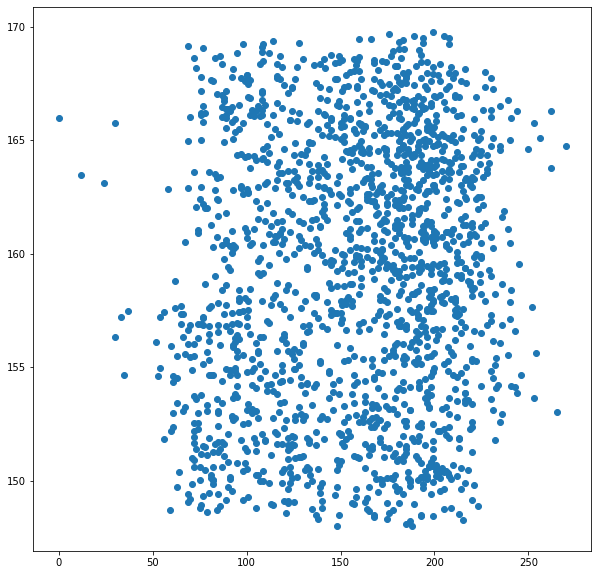

In [108]:
y_pred1 = regressor.predict(X_test)
plt.scatter(y_test,y_pred1)
rrmse1=np.sqrt(metrics.mean_squared_error(y_test,y_pred1))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred1))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred1))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))

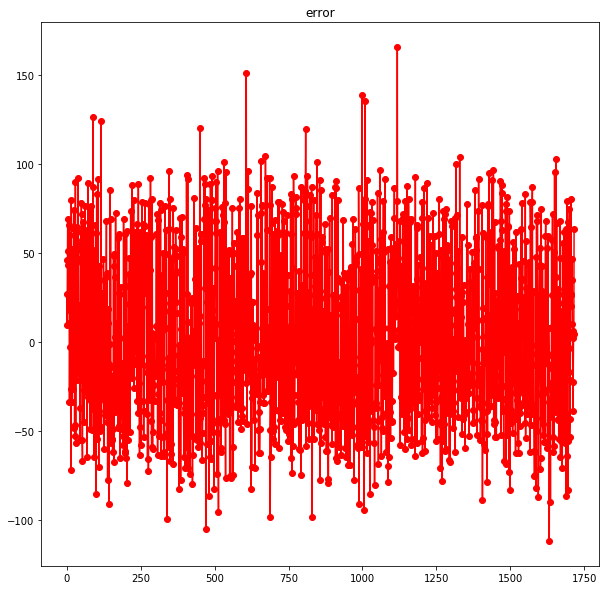

In [44]:
metrics.r2_score(y_test,y_pred1)
e= [x-y for x,y in zip(y_pred1,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

Score: 0.5555900715468215
R²: 0.56
Feature: 0, Score: 0.13164
Feature: 1, Score: 0.07683
Feature: 2, Score: 0.79153


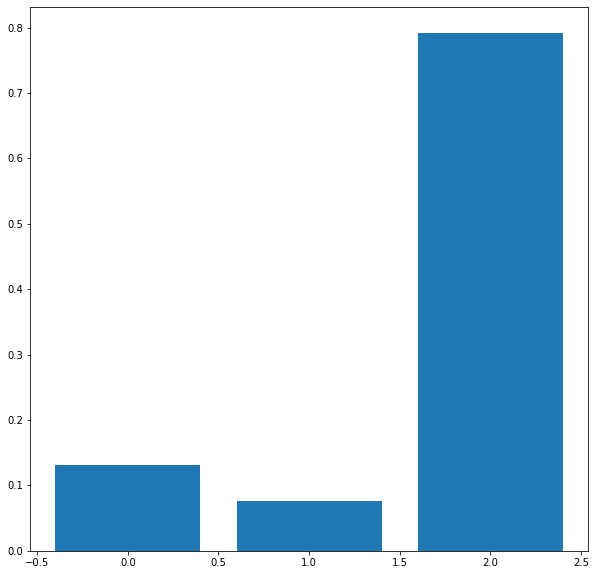

Mean Absolute Error: 22.885653271209478
Mean Squared Error: 998.4543049893224
Root Mean Squared Error: 31.598327566333673


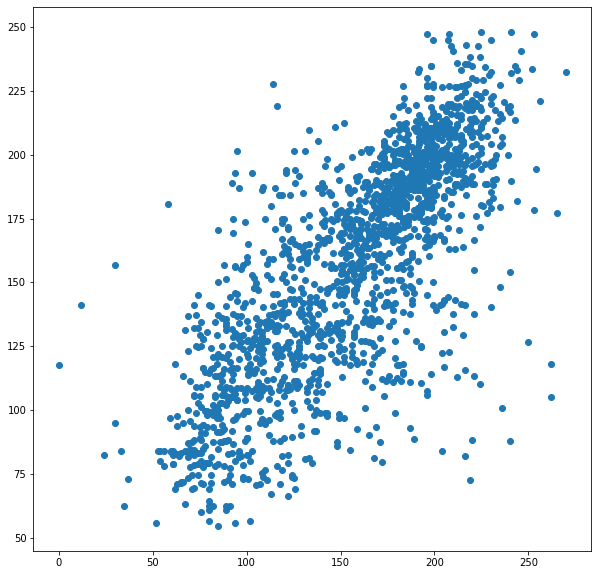

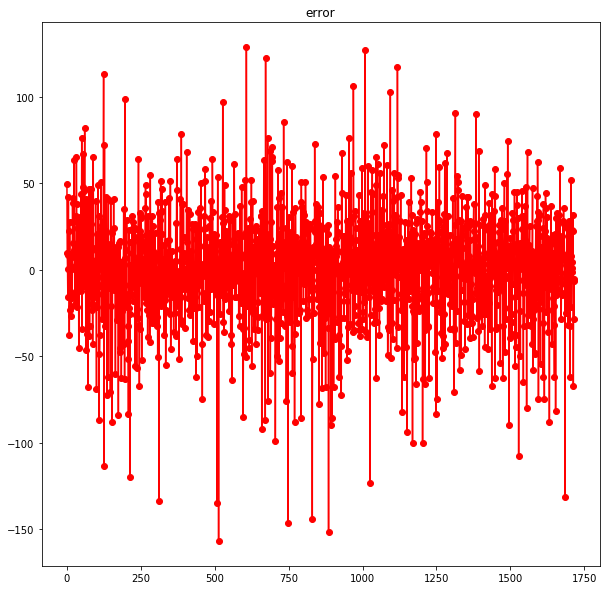

In [109]:
# Step 8a: Print the RMSE between the y test and the prediction
clf = DecisionTreeRegressor()
clf.fit(X_train,y_train)
y_predc = clf.predict(X_test)
score = clf.score(X_test,y_test)
print('Score:',score)
print('R²: %.2f' % metrics.r2_score(y_test, y_predc))

#get importance
importance = clf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'% (i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()
# Mean Absolute Error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predc))

 # Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_predc))

 # Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predc)))
# Step 8b: Plot a scatter plot test dependent variables vs predictions

dermse1=np.sqrt(metrics.mean_squared_error(y_test,y_predc))

plt.scatter(y_test,y_predc)
plt.show()
e= [x-y for x,y in zip(y_predc,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

Score: 0.578343969308496
R²: 0.58
Feature: 0, Score: 0.13626
Feature: 1, Score: 0.10977
Feature: 2, Score: 0.75397


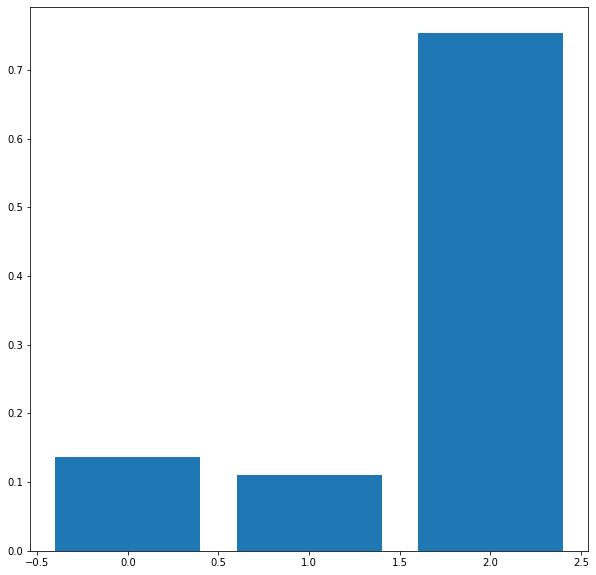

Mean Absolute Error: 22.197523295703846
Mean Squared Error: 947.3331987293747
Root Mean Squared Error: 30.778778382667735


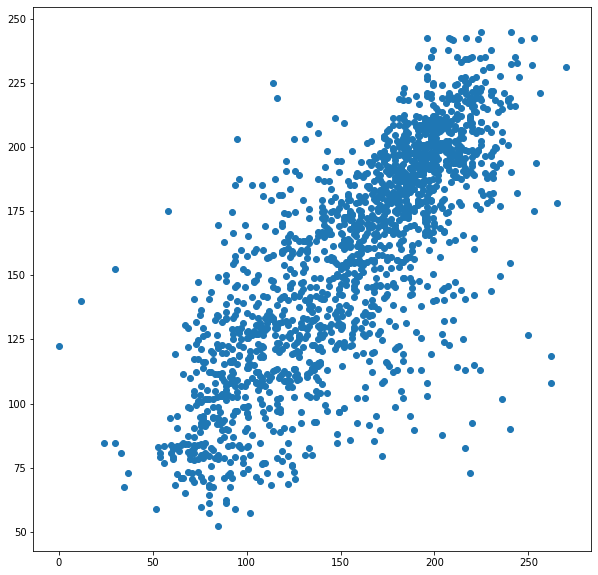

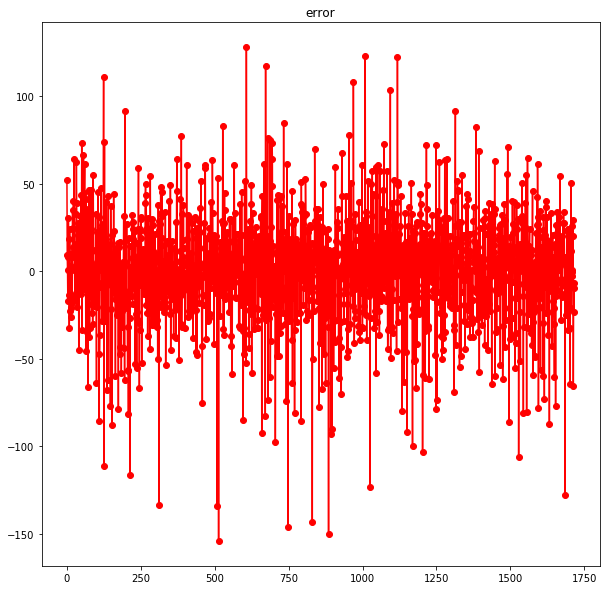

In [164]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train,y_train)
y_predr = rf.predict(X_test)
score = rf.score(X_test,y_test)
print('Score:',score)
print('R²: %.2f' % metrics.r2_score(y_test, y_predr))


#get importance
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'% (i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()

# Mean Absolute Error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predr))

 # Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_predr))

 # Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predr)))
# Step 8b: Plot a scatter plot test dependent variables vs predictions

rfrmse1=np.sqrt(metrics.mean_squared_error(y_test,y_predr))

plt.scatter(y_test,y_predr)
plt.show()
e= [x-y for x,y in zip(y_predr,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

# Sector 1 RMSE summary

In [165]:
summary1 = pd.DataFrame([{'DummyRMSE':drmse1,'LinearRMSE':rrmse1,'DecisionTreeRMSE':dermse1,'RandomForestRMSE':rfrmse1}])
index=summary1.index
index.name="Sector1"
summary1.head()

,DummyRMSE,LinearRMSE,DecisionTreeRMSE,RandomForestRMSE
Sector1,,,,
0,47.446735,47.145174,31.598328,30.778778


# Sector 2



In [166]:
X_train, X_test, y_train, y_test = train_test_split(X,y2, test_size=0.2,random_state=0)

dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train,y_train)
y_pred = dummy.predict(X_test)
dfpred = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

drmse2=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 193.12375847313237
Mean Squared Error: 53444.037158007566
Root Mean Squared Error: 231.1796642397587


## Sector 2 Linear Regression

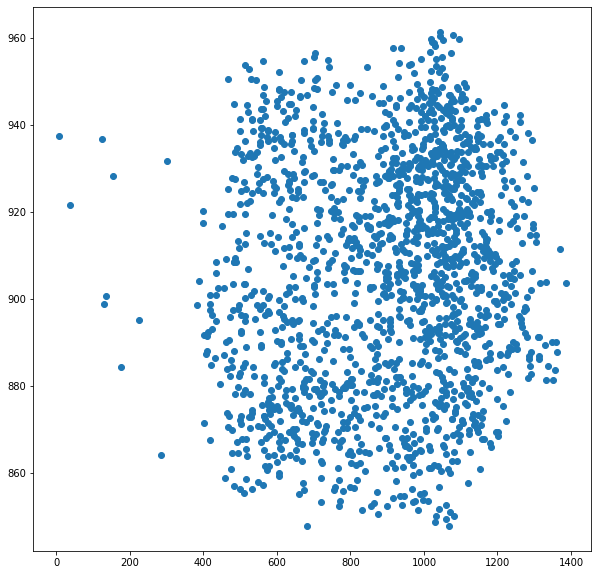

Mean Absolute Error: 190.4543152278931
Mean Squared Error: 52804.967424537914
Root Mean Squared Error: 229.7933145775523
R2 Score: 0.010537498373960896


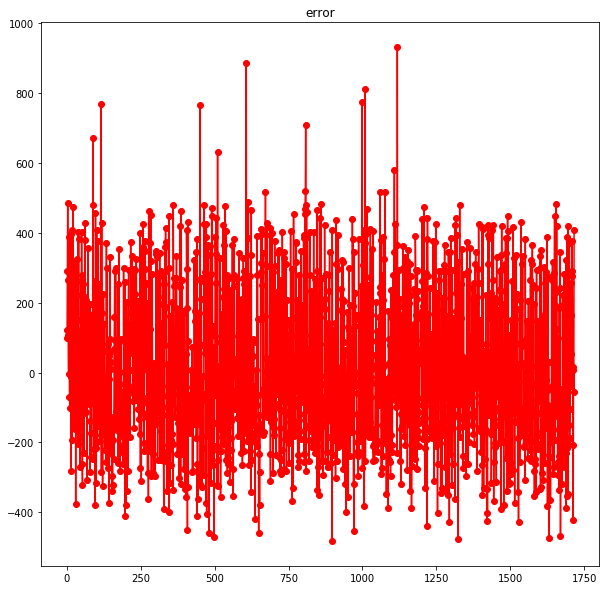

In [117]:
regressor = LinearRegression(normalize=True)
regressor.fit(X_train,y_train)
y_pred1 = regressor.predict(X_test)
plt.scatter(y_test,y_pred1)
plt.show()
rrmse2=np.sqrt(metrics.mean_squared_error(y_test,y_pred1))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred1))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred1))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))
print('R2 Score:',metrics.r2_score(y_test,y_pred1))
e = [x-y for x,y in zip(y_pred1,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

## Sector 2 Decision Tree

Score: 0.6799073954983457
R²: 0.68
Feature: 0, Score: 0.11464
Feature: 1, Score: 0.07525
Feature: 2, Score: 0.81011


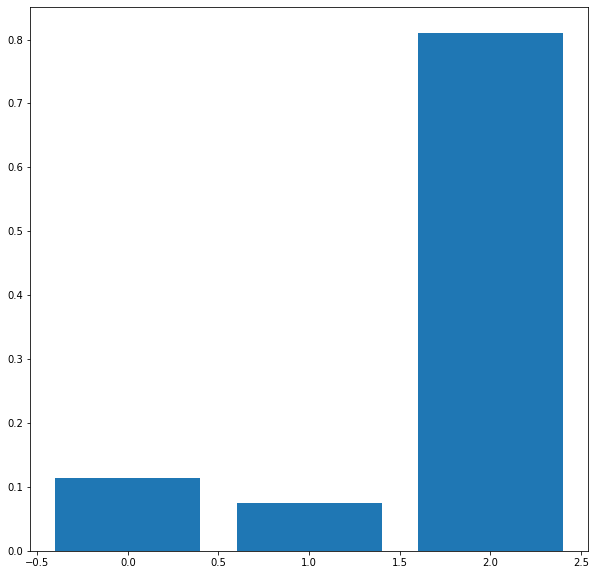

Mean Absolute Error: 90.92710153368277
Mean Squared Error: 17082.48622435773
Root Mean Squared Error: 130.69998555607316


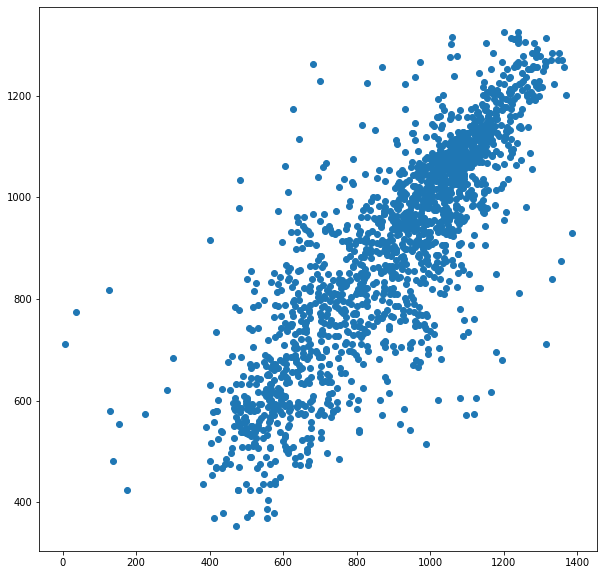

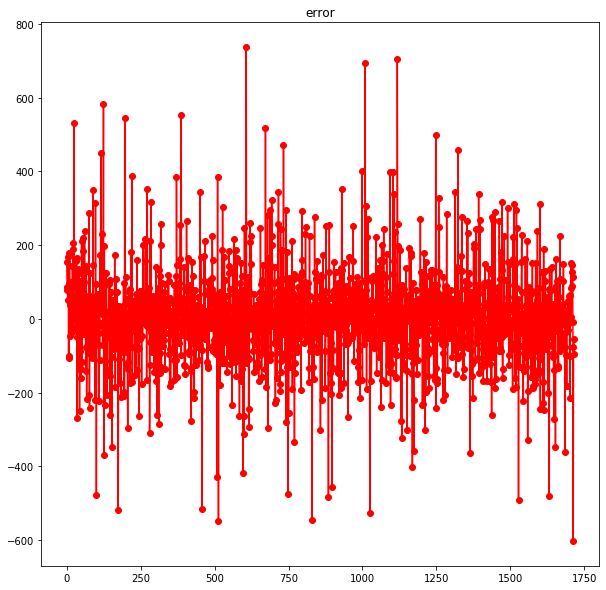

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X,y2, test_size=0.2,random_state=0)
clf = DecisionTreeRegressor()
clf.fit(X_train,y_train)
y_predc = clf.predict(X_test)
score = clf.score(X_test,y_test)
print('Score:',score)
print('R²: %.2f' % metrics.r2_score(y_test, y_predc))

#get importance
importance = clf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'% (i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()
# Mean Absolute Error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predc))

 # Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_predc))

 # Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predc)))
# Plot a scatter plot test dependent variables vs predictions
dermse2=np.sqrt(metrics.mean_squared_error(y_test,y_predc))

plt.scatter(y_test,y_predc)
plt.show()
e= [x-y for x,y in zip(y_predc,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

## Sector 2 RandomForest

Score: 0.698431937046077
R²: 0.70
Feature: 0, Score: 0.12446
Feature: 1, Score: 0.09904
Feature: 2, Score: 0.77650


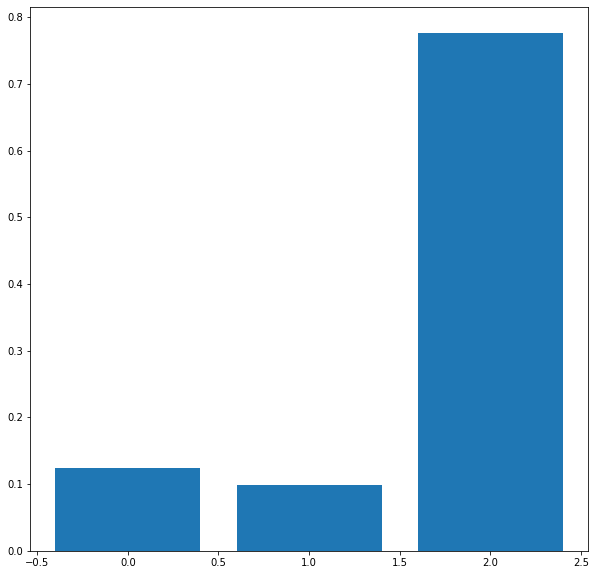

Mean Absolute Error: 88.02906650540456
Mean Squared Error: 16093.88098527597
Root Mean Squared Error: 126.861660817112


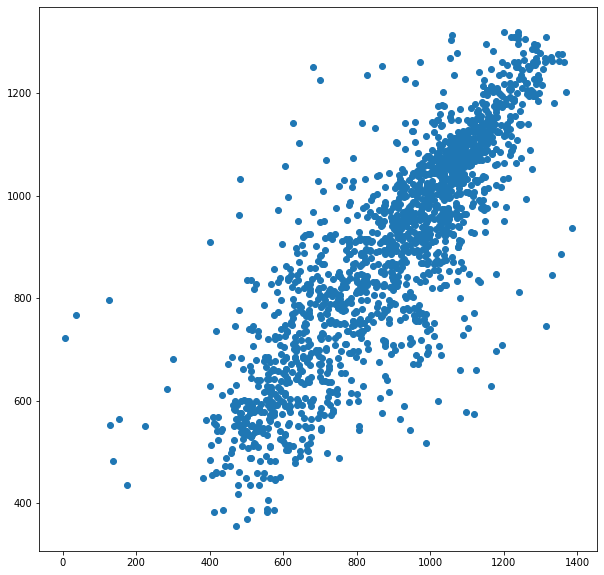

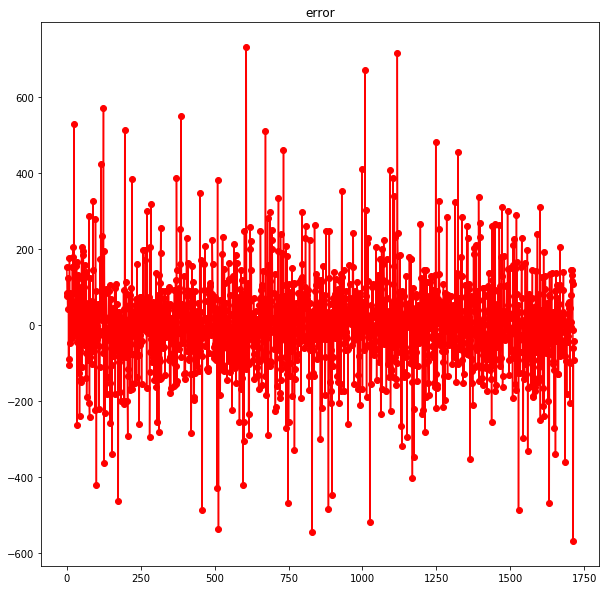

In [174]:
rf = RandomForestRegressor(n_estimators=1000, random_state = 42)
rf.fit(X_train,y_train)
y_predr = rf.predict(X_test)
score = rf.score(X_test,y_test)
print('Score:',score)
print('R²: %.2f' % metrics.r2_score(y_test, y_predr))


#get importance
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'% (i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()

# Mean Absolute Error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predr))

 # Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_predr))

 # Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predr)))
# Plot a scatter plot test dependent variables vs predictions
rfrmse2=np.sqrt(metrics.mean_squared_error(y_test,y_predr))

plt.scatter(y_test,y_predr)
plt.show()
e= [x-y for x,y in zip(y_predr,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

# Sector 2 Summary

In [172]:
summary2 = pd.DataFrame([{'DummyRMSE':drmse2,'LinearRMSE':rrmse2,'DecisionTreeRMSE':dermse2,'RandomForestRMSE':rfrmse2}])
index=summary2.index
index.name="Sector2"
summary2.head()

,DummyRMSE,LinearRMSE,DecisionTreeRMSE,RandomForestRMSE
Sector2,,,,
0,231.179664,229.793315,130.699986,126.861661


# Sector 3

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y3, test_size=0.2,random_state=0)

dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train,y_train)
y_pred = dummy.predict(X_test)
dfpred = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
drmse3=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 15.078595048418869
Mean Squared Error: 362.4623928581417
Root Mean Squared Error: 19.038445127114286


## Sector 3 Linear Regression

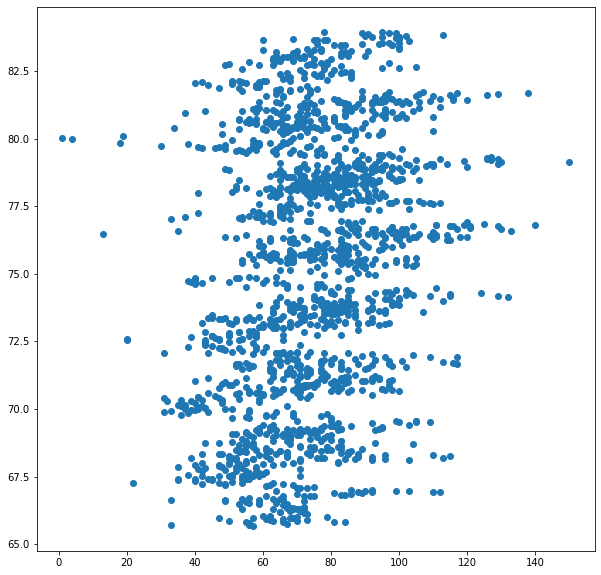

Mean Absolute Error: 14.444514767432851
Mean Squared Error: 334.74199000187855
Root Mean Squared Error: 18.295955564055095
R2 Score: 0.07639125433402194


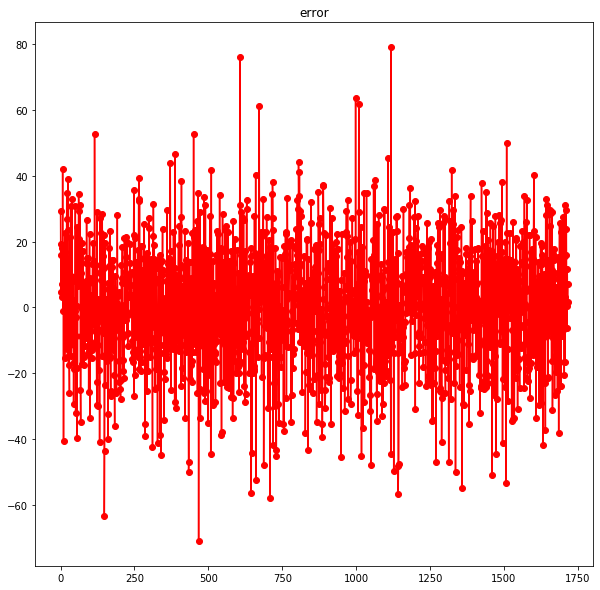

In [123]:
regressor = LinearRegression(normalize=True)
regressor.fit(X_train,y_train)
y_pred1 = regressor.predict(X_test)
plt.scatter(y_test,y_pred1)
plt.show()
rrmse3=np.sqrt(metrics.mean_squared_error(y_test,y_pred1))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred1))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred1))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))
print('R2 Score:',metrics.r2_score(y_test,y_pred1))
e = [x-y for x,y in zip(y_pred1,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

## Sector 3 Decision Tree

Score: 0.3870548835366011
R²: 0.39
Feature: 0, Score: 0.27593
Feature: 1, Score: 0.14812
Feature: 2, Score: 0.57595


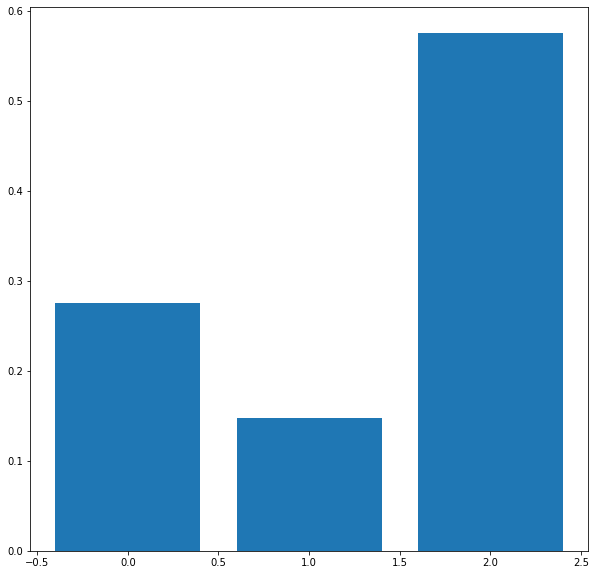

Mean Absolute Error: 11.479615608619685
Mean Squared Error: 222.1486847214133
Root Mean Squared Error: 14.904653123149606


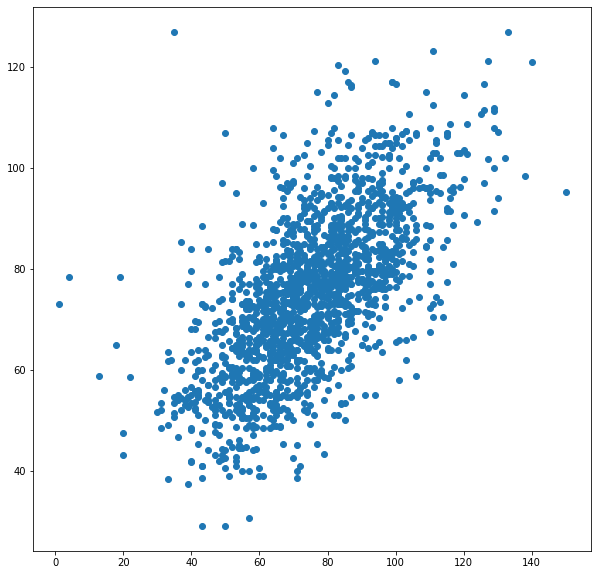

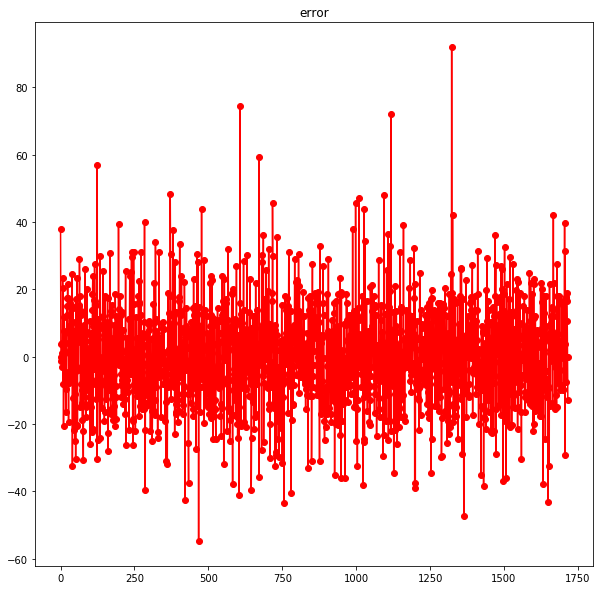

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y3, test_size=0.2,random_state=0)
clf = DecisionTreeRegressor()
clf.fit(X_train,y_train)
y_predc = clf.predict(X_test)
score = clf.score(X_test,y_test)
print('Score:',score)
print('R²: %.2f' % metrics.r2_score(y_test, y_predc))

#get importance
importance = clf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'% (i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()
# Mean Absolute Error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predc))

 # Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_predc))

 # Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predc)))
# Plot a scatter plot test dependent variables vs predictions

dermse3=np.sqrt(metrics.mean_squared_error(y_test,y_predc))
plt.scatter(y_test,y_predc)
plt.show()
e= [x-y for x,y in zip(y_predc,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

## Sector 3 Random Forest

Score: 0.4207546748956946
R²: 0.42
Feature: 0, Score: 0.26187
Feature: 1, Score: 0.19357
Feature: 2, Score: 0.54456


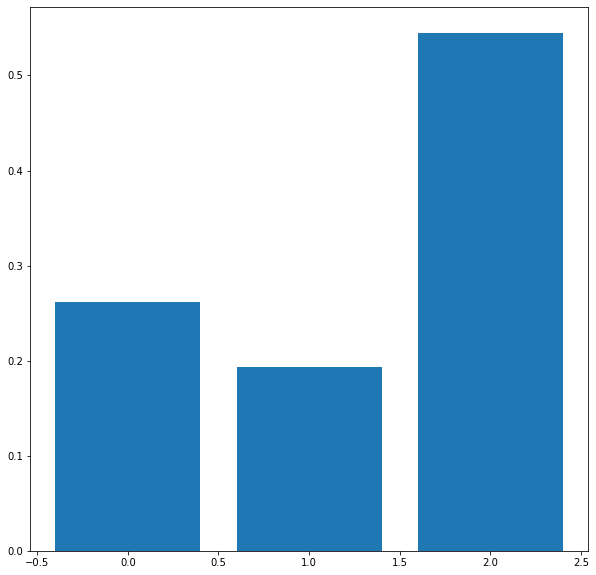

Mean Absolute Error: 11.146915458527104
Mean Squared Error: 209.93492508008705
Root Mean Squared Error: 14.489131274168479


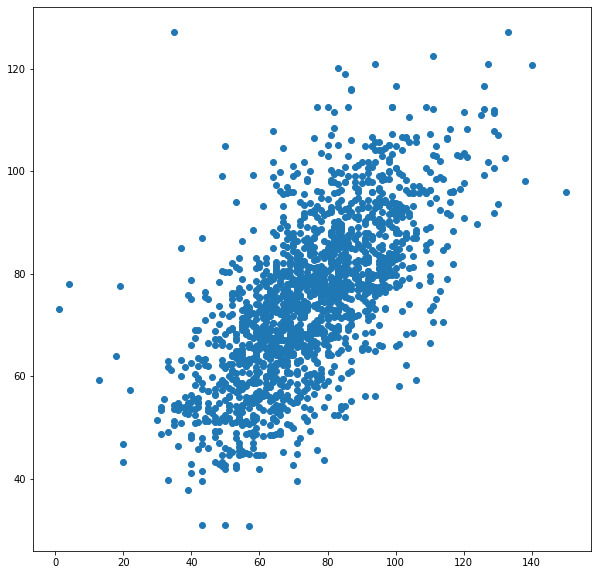

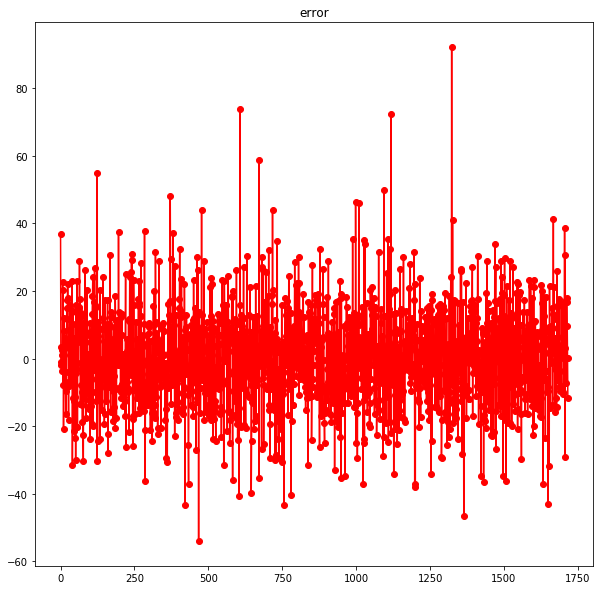

In [125]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train,y_train)
y_predr = rf.predict(X_test)
score = rf.score(X_test,y_test)
print('Score:',score)
print('R²: %.2f' % metrics.r2_score(y_test, y_predr))


#get importance
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'% (i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()

# Mean Absolute Error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predr))

 # Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_predr))

 # Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predr)))
# Plot a scatter plot test dependent variables vs predictions
rfrmse3=np.sqrt(metrics.mean_squared_error(y_test,y_predr))
plt.scatter(y_test,y_predr)
plt.show()
e= [x-y for x,y in zip(y_predr,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()


In [151]:
summary3 = pd.DataFrame([{'DummyRMSE':drmse3,'LinearRMSE':rrmse3,'DecisionTreeRMSE':dermse3,'RandomForestRMSE':rfrmse3}])
index=summary3.index
index.name="Sector3"
summary3.head()

,DummyRMSE,LinearRMSE,DecisionTreeRMSE,RandomForestRMSE
Sector3,,,,
0,19.038445,18.295956,14.904653,14.489131


## Sector 4

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y4, test_size=0.2,random_state=0)

dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train,y_train)
y_pred = dummy.predict(X_test)
dfpred = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
drmse4=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 89.4587083708371
Mean Squared Error: 13157.102371308321
Root Mean Squared Error: 114.70441304199382


## Sector 4 Linear Regression

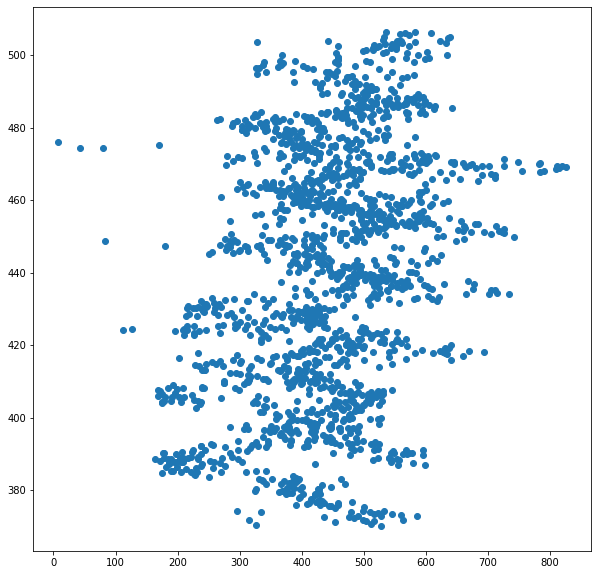

Mean Absolute Error: 85.86193807173464
Mean Squared Error: 11921.311753524677
Root Mean Squared Error: 109.18475971272125
R2 Score: 0.09366347233651018


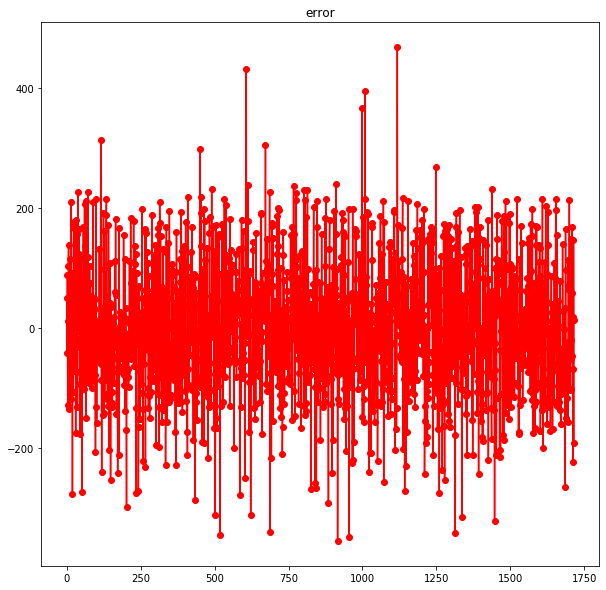

In [128]:
regressor = LinearRegression(normalize=True)
regressor.fit(X_train,y_train)
y_pred1 = regressor.predict(X_test)
plt.scatter(y_test,y_pred1)
plt.show()
rrmse4=np.sqrt(metrics.mean_squared_error(y_test,y_pred1))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred1))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred1))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))
print('R2 Score:',metrics.r2_score(y_test,y_pred1))
e = [x-y for x,y in zip(y_pred1,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

## Sector 4 Decision Tree

Score: 0.45173558889188836
R²: 0.45
Feature: 0, Score: 0.27006
Feature: 1, Score: 0.09471
Feature: 2, Score: 0.63523


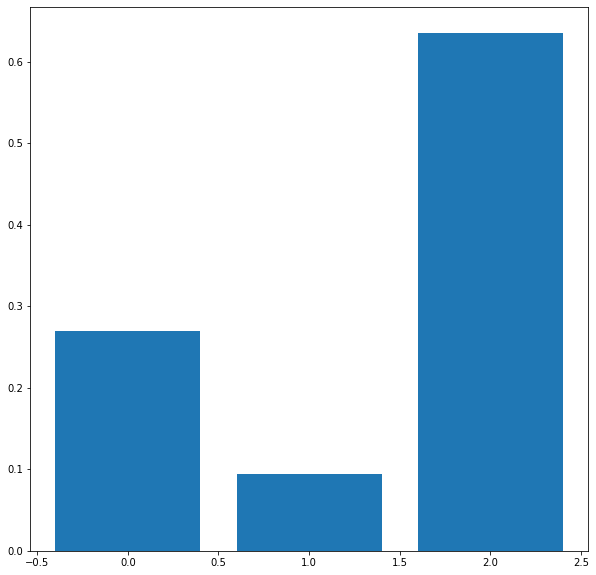

Mean Absolute Error: 60.657299553484755
Mean Squared Error: 7211.483559017665
Root Mean Squared Error: 84.92045430293967


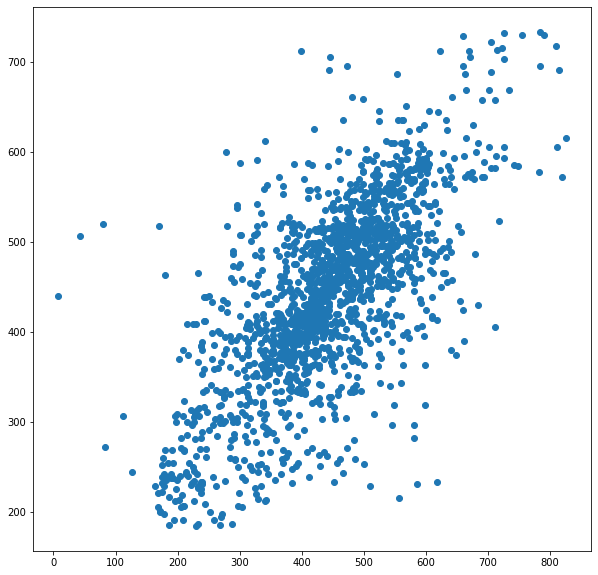

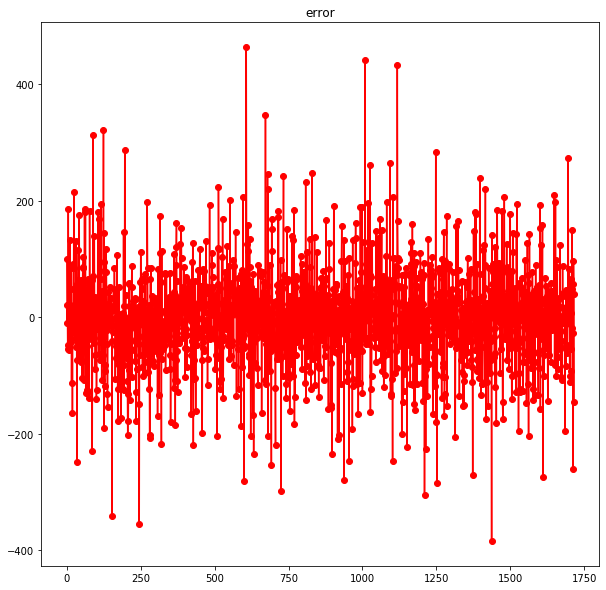

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y4, test_size=0.2,random_state=0)
clf = DecisionTreeRegressor()
clf.fit(X_train,y_train)
y_predc = clf.predict(X_test)
score = clf.score(X_test,y_test)
print('Score:',score)
print('R²: %.2f' % metrics.r2_score(y_test, y_predc))

#get importance
importance = clf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'% (i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()
# Mean Absolute Error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predc))

 # Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_predc))

 # Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predc)))
#  Plot a scatter plot test dependent variables vs predictions
dermse4=np.sqrt(metrics.mean_squared_error(y_test,y_predc))

plt.scatter(y_test,y_predc)
plt.show()
e= [x-y for x,y in zip(y_predc,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

## Sector 4 Random Forest

Score: 0.49030613053897854
R²: 0.49
Feature: 0, Score: 0.26431
Feature: 1, Score: 0.14435
Feature: 2, Score: 0.59134


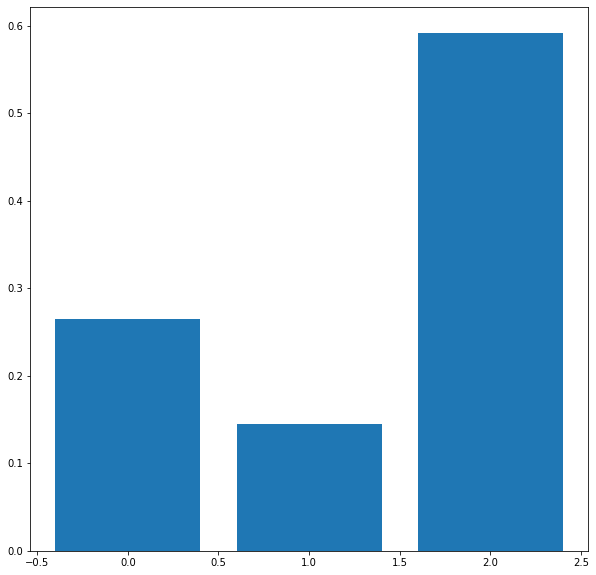

Mean Absolute Error: 58.39949223646185
Mean Squared Error: 6704.1538448963
Root Mean Squared Error: 81.878897433321


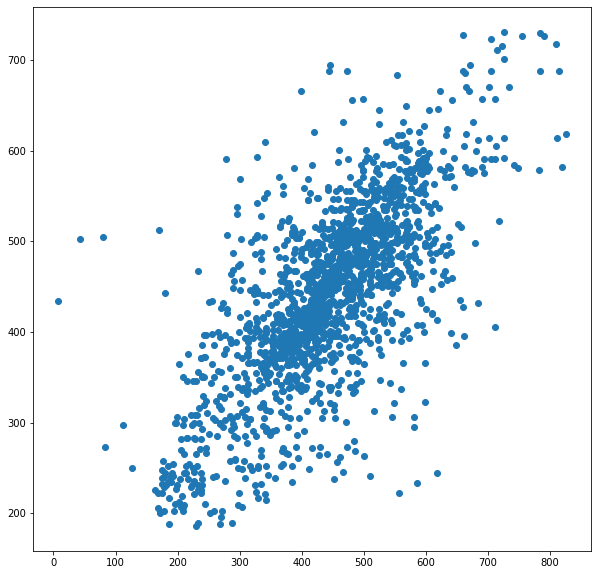

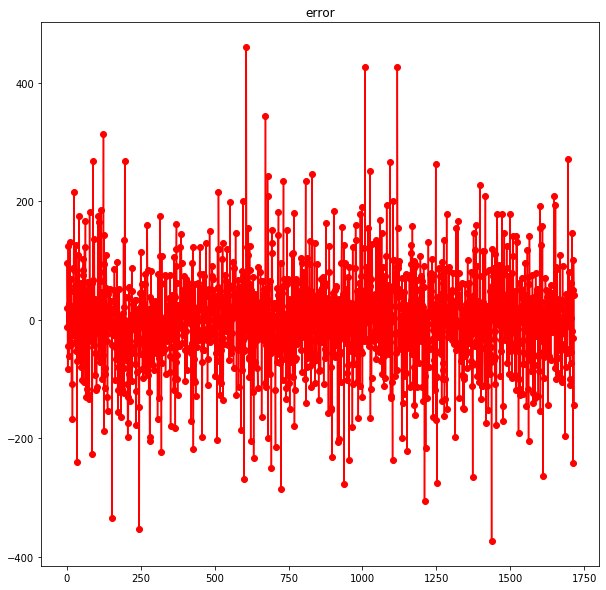

In [130]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train,y_train)
y_predr = rf.predict(X_test)
score = rf.score(X_test,y_test)
print('Score:',score)
print('R²: %.2f' % metrics.r2_score(y_test, y_predr))


#get importance
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'% (i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()

# Mean Absolute Error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predr))

 # Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_predr))

 # Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predr)))
#  Plot a scatter plot test dependent variables vs predictions
rfrmse4=np.sqrt(metrics.mean_squared_error(y_test,y_predr))

plt.scatter(y_test,y_predr)
plt.show()
e= [x-y for x,y in zip(y_predr,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

# Sector 4 summary

In [150]:
summary4 = pd.DataFrame([{'DummyRMSE':drmse4,'LinearRMSE':rrmse4,'DecisionTreeRMSE':dermse4,'RandomForestRMSE':rfrmse4}])
index=summary4.index
index.name="Sector4"
summary4.head()

,DummyRMSE,LinearRMSE,DecisionTreeRMSE,RandomForestRMSE
Sector4,,,,
0,114.704413,109.18476,84.920454,81.878897


# Sector 5

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y5, test_size=0.2,random_state=0)

dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train,y_train)
y_pred = dummy.predict(X_test)
dfpred = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
drmse5=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 452.1921670108187
Mean Squared Error: 300361.42189009965
Root Mean Squared Error: 548.0523897312187


## Sector 5 Linear Regression

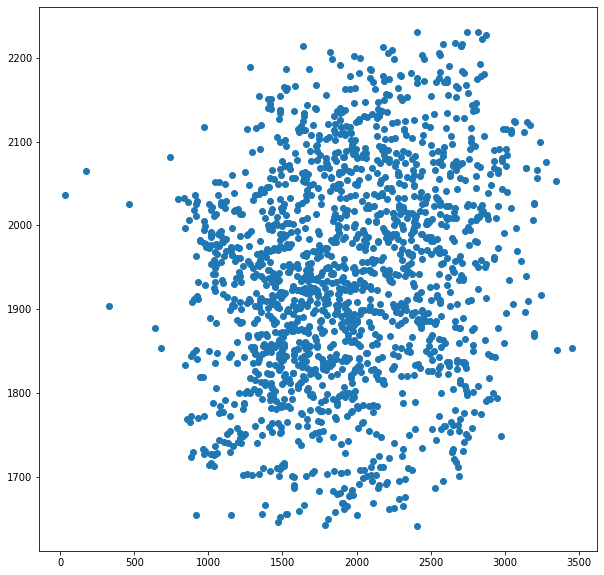

Mean Absolute Error: 441.88866191948534
Mean Squared Error: 288893.50567626057
Root Mean Squared Error: 537.4881446843833
R2 Score: 0.03809625999352817


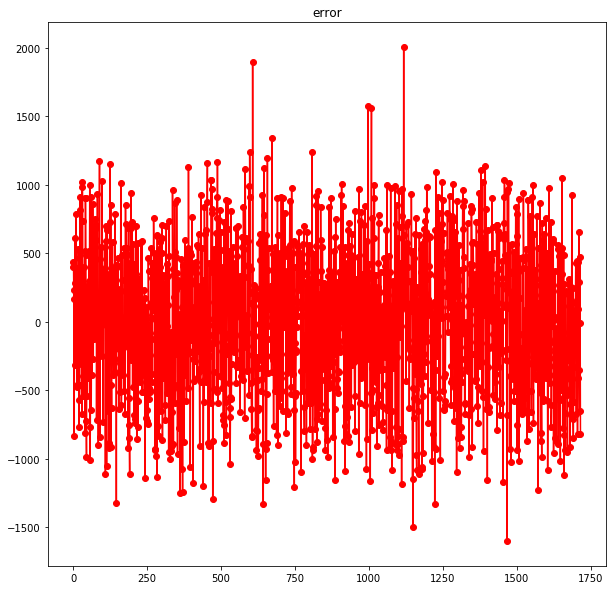

In [133]:
regressor = LinearRegression(normalize=True)
regressor.fit(X_train,y_train)
y_pred1 = regressor.predict(X_test)
plt.scatter(y_test,y_pred1)
plt.show()
rrmse5=np.sqrt(metrics.mean_squared_error(y_test,y_pred1))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred1))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred1))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))
print('R2 Score:',metrics.r2_score(y_test,y_pred1))
e = [x-y for x,y in zip(y_pred1,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

## Sector 5 Decision Tree

Score: 0.4811308638680599
R²: 0.48
Feature: 0, Score: 0.21022
Feature: 1, Score: 0.08645
Feature: 2, Score: 0.70333


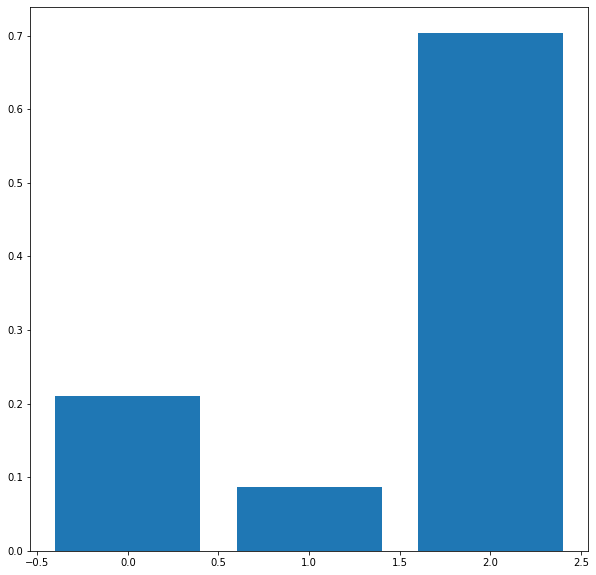

Mean Absolute Error: 284.92947971267716
Mean Squared Error: 155834.64071296834
Root Mean Squared Error: 394.7589653357709


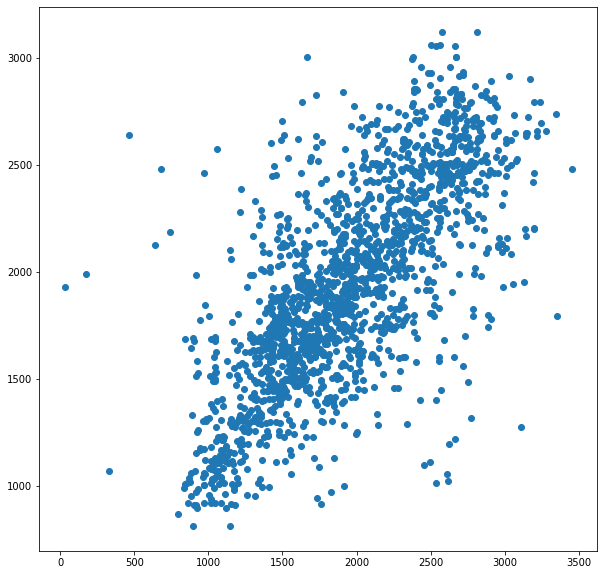

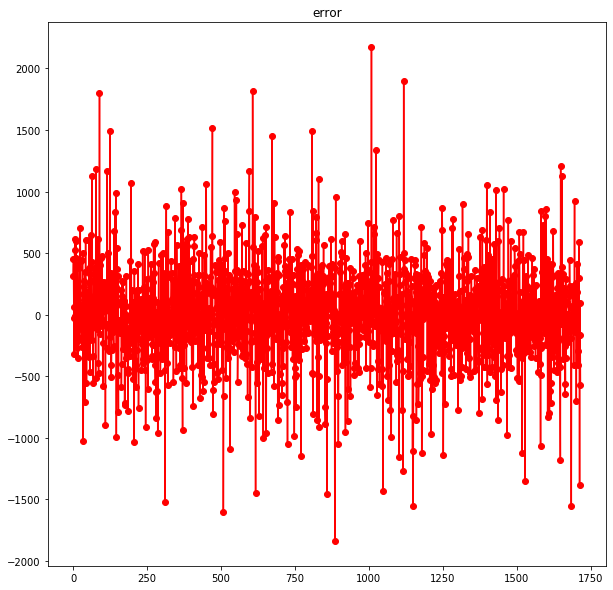

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X,y5, test_size=0.2,random_state=0)
clf = DecisionTreeRegressor()
clf.fit(X_train,y_train)
y_predc = clf.predict(X_test)
score = clf.score(X_test,y_test)
print('Score:',score)
print('R²: %.2f' % metrics.r2_score(y_test, y_predc))

#get importance
importance = clf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'% (i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()
# Mean Absolute Error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predc))

 # Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_predc))

 # Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predc)))
# Plot a scatter plot test dependent variables vs predictions
dermse5=np.sqrt(metrics.mean_squared_error(y_test,y_predc))

plt.scatter(y_test,y_predc)
plt.show()
e= [x-y for x,y in zip(y_predc,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

## Sector 5 RandomForest

Score: 0.5113662007827402
R²: 0.51
Feature: 0, Score: 0.21392
Feature: 1, Score: 0.13731
Feature: 2, Score: 0.64877


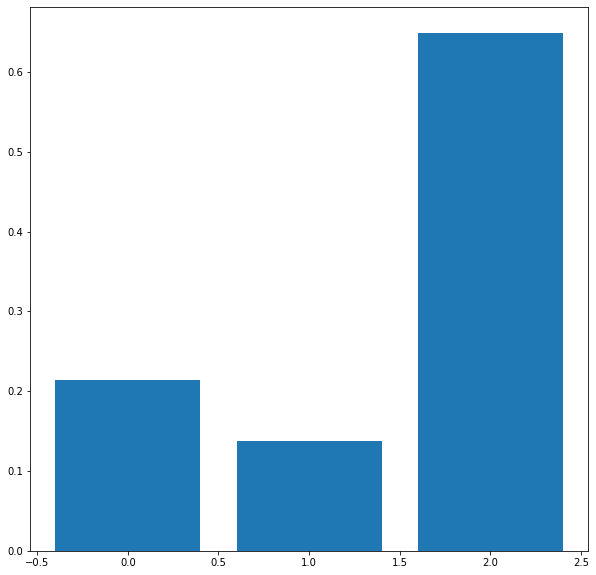

Mean Absolute Error: 274.8355992894635
Mean Squared Error: 146753.90621397778
Root Mean Squared Error: 383.084724589715


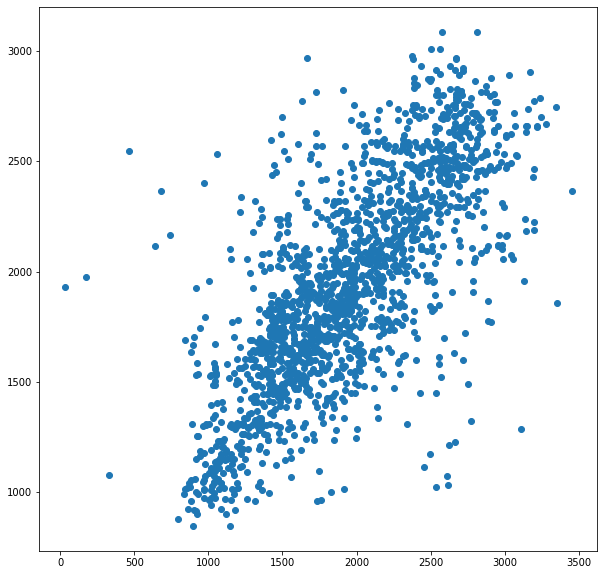

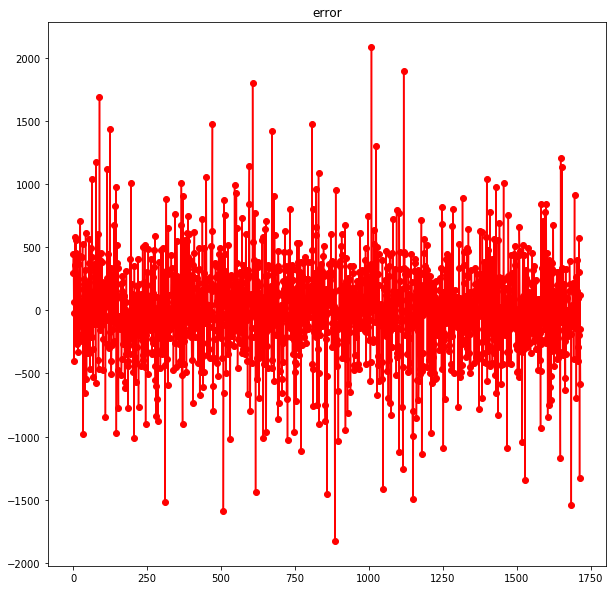

In [136]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train,y_train)
y_predr = rf.predict(X_test)
score = rf.score(X_test,y_test)
print('Score:',score)
print('R²: %.2f' % metrics.r2_score(y_test, y_predr))


#get importance
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'% (i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()

# Mean Absolute Error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predr))

 # Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_predr))

 # Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predr)))
# Plot a scatter plot test dependent variables vs predictions
rfrmse5=np.sqrt(metrics.mean_squared_error(y_test,y_predr))
plt.scatter(y_test,y_predr)
plt.show()
e= [x-y for x,y in zip(y_predr,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

# Sector 5 summary

In [149]:
summary5 = pd.DataFrame([{'DummyRMSE':drmse5,'LinearRMSE':rrmse5,'DecisionTreeRMSE':dermse5,'RandomForestRMSE':rfrmse5}])
index=summary5.index
index.name="Sector5"
summary5.head()

,DummyRMSE,LinearRMSE,DecisionTreeRMSE,RandomForestRMSE
Sector5,,,,
0,548.05239,537.488145,394.758965,383.084725


# Sector 6

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y6, test_size=0.2,random_state=0)

dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train,y_train)
y_pred = dummy.predict(X_test)
dfpred = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
drmse6=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 139.57437596135182
Mean Squared Error: 28672.780178352714
Root Mean Squared Error: 169.33038764011826


## Sector 6 Linear regression

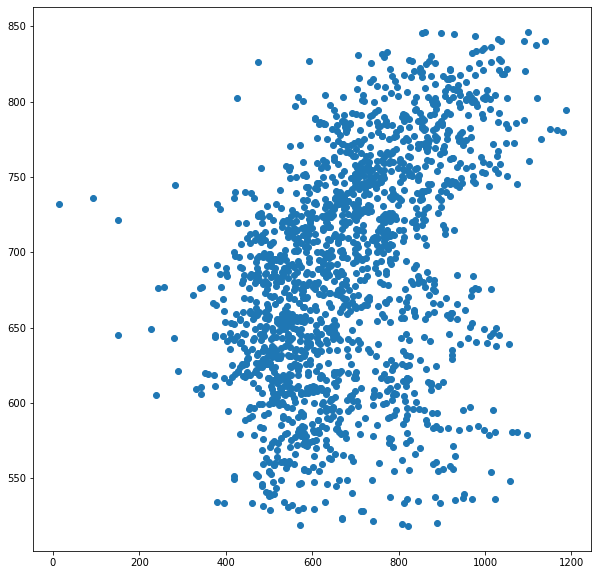

Mean Absolute Error: 122.85688750027202
Mean Squared Error: 24095.3922863538
Root Mean Squared Error: 155.22690580680205
R2 Score: 0.1594309797940172


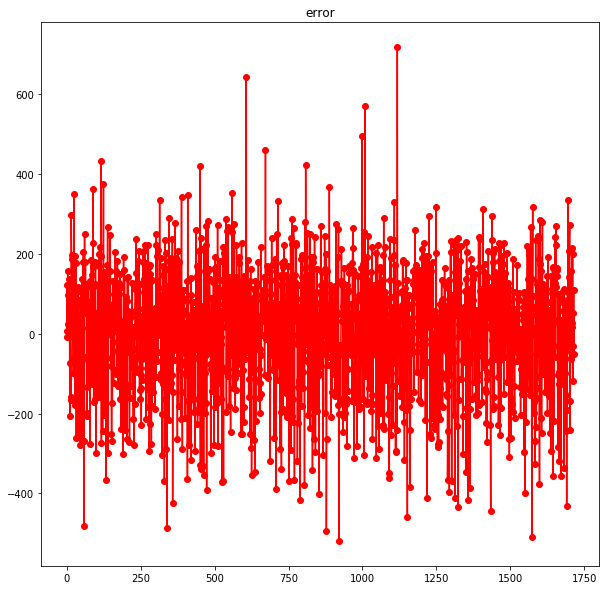

In [139]:
regressor = LinearRegression(normalize=True)
regressor.fit(X_train,y_train)
y_pred1 = regressor.predict(X_test)
plt.scatter(y_test,y_pred1)
plt.show()
rrmse6=np.sqrt(metrics.mean_squared_error(y_test,y_pred1))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred1))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred1))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))
print('R2 Score:',metrics.r2_score(y_test,y_pred1))
e = [x-y for x,y in zip(y_pred1,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

## Sector 6 DecisionTree

Score: 0.5478153664952016
R²: 0.55
Feature: 0, Score: 0.13966
Feature: 1, Score: 0.08413
Feature: 2, Score: 0.77621


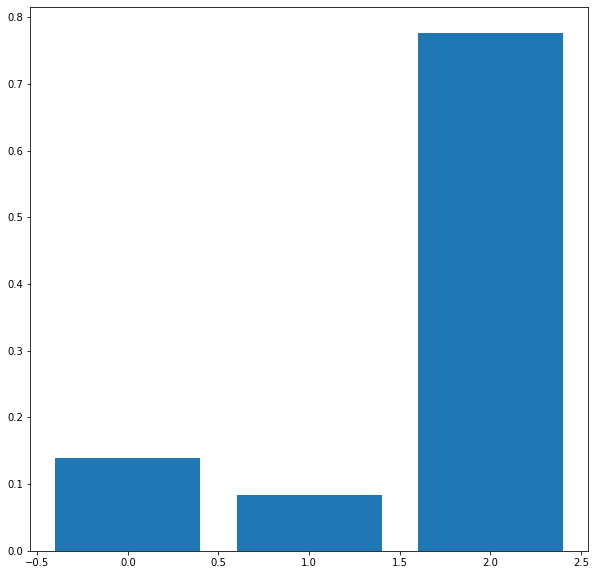

Mean Absolute Error: 82.85944476800623
Mean Squared Error: 12962.131446968226
Root Mean Squared Error: 113.85135680776152


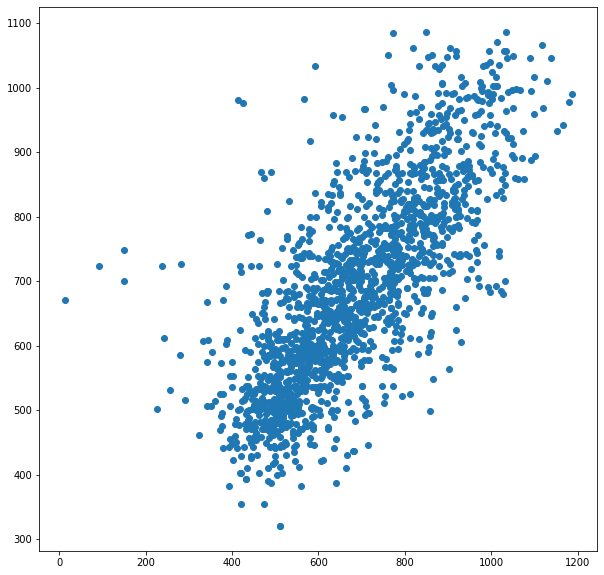

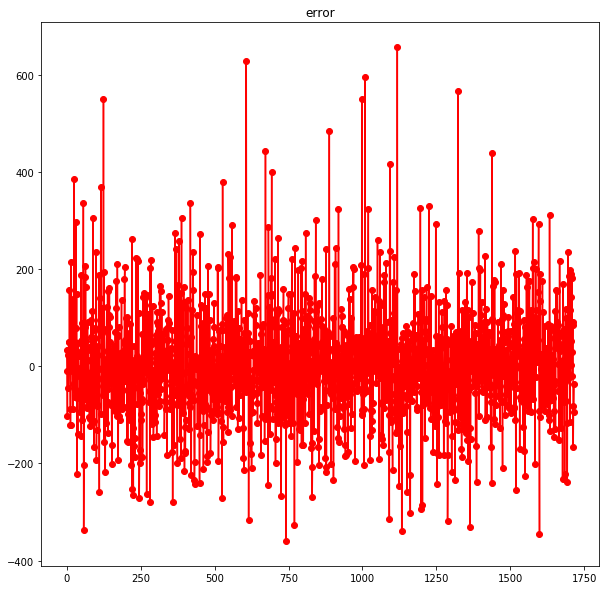

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X,y6, test_size=0.2,random_state=0)
clf = DecisionTreeRegressor()
clf.fit(X_train,y_train)
y_predc = clf.predict(X_test)
score = clf.score(X_test,y_test)
print('Score:',score)
print('R²: %.2f' % metrics.r2_score(y_test, y_predc))

#get importance
importance = clf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'% (i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()
# Mean Absolute Error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predc))

 # Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_predc))

 # Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predc)))
# Plot a scatter plot test dependent variables vs predictions
dermse6=np.sqrt(metrics.mean_squared_error(y_test,y_predc))

plt.scatter(y_test,y_predc)
plt.show()
e= [x-y for x,y in zip(y_predc,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

## Sector 6 RandomForest

Score: 0.5772840776960536
R²: 0.58
Feature: 0, Score: 0.15299
Feature: 1, Score: 0.12235
Feature: 2, Score: 0.72466


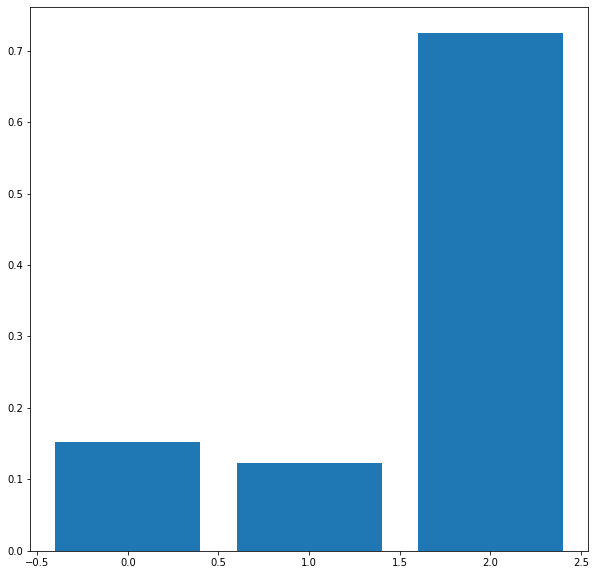

Mean Absolute Error: 80.17046249025033
Mean Squared Error: 12117.39396617956
Root Mean Squared Error: 110.07903508924649


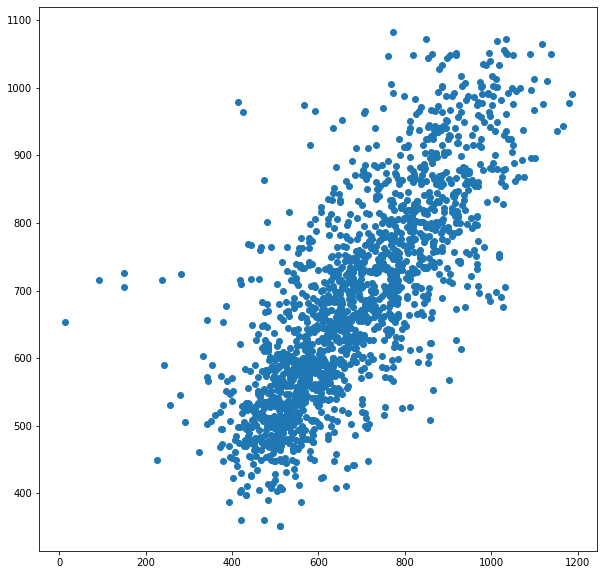

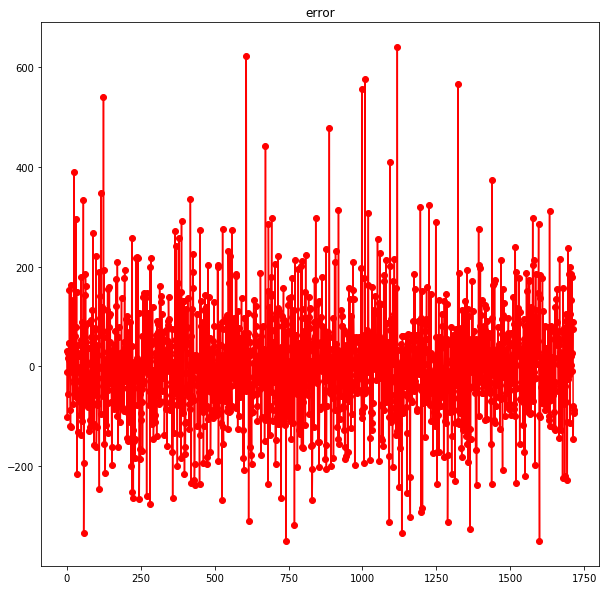

In [141]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train,y_train)
y_predr = rf.predict(X_test)
score = rf.score(X_test,y_test)
print('Score:',score)
print('R²: %.2f' % metrics.r2_score(y_test, y_predr))


#get importance
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'% (i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()

# Mean Absolute Error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predr))

 # Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_predr))

 # Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predr)))
#  Plot a scatter plot test dependent variables vs predictions
rfrmse6=np.sqrt(metrics.mean_squared_error(y_test,y_predr))
plt.scatter(y_test,y_predr)
plt.show()
e= [x-y for x,y in zip(y_predr,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

# Sector 6 summary

In [143]:
summary6 = pd.DataFrame([{'DummyRMSE':drmse6,'LinearRMSE':rrmse6,'DecisionTreeRMSE':dermse6,'RandomForestRMSE':rfrmse6}])
index=summary6.index
index.name="Sector6"
summary6.head()

,DummyRMSE,LinearRMSE,DecisionTreeRMSE,RandomForestRMSE
Sector6,,,,
0,169.330388,155.226906,113.851357,110.079035


# Sector 8

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y7, test_size=0.2,random_state=0)

dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train,y_train)
y_pred = dummy.predict(X_test)
dfpred = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
drmse8=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 11.074274310915255
Mean Squared Error: 185.65160433448585
Root Mean Squared Error: 13.625402905400113


## Sector 8 Linear Regression

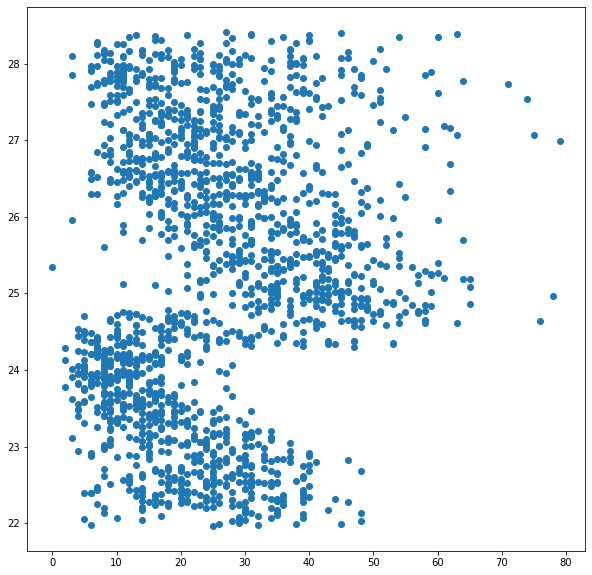

Mean Absolute Error: 11.031657204751857
Mean Squared Error: 182.43955912859414
Root Mean Squared Error: 13.507018883846802
R2 Score: 0.016684388718827936


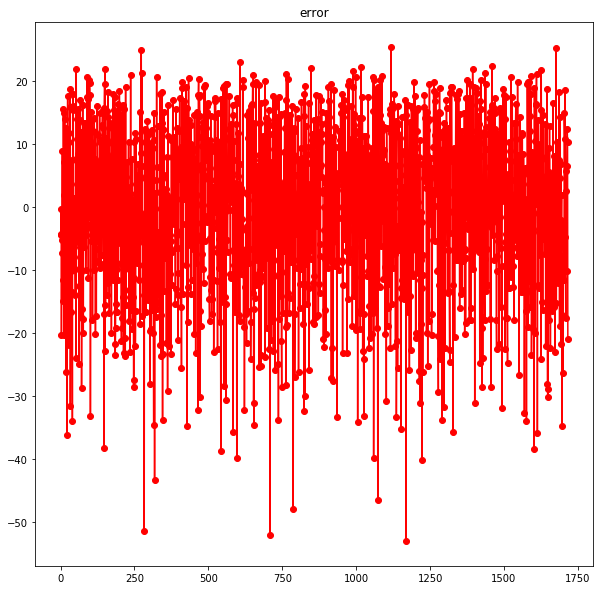

In [145]:
regressor = LinearRegression(normalize=True)
regressor.fit(X_train,y_train)
y_pred1 = regressor.predict(X_test)
plt.scatter(y_test,y_pred1)
plt.show()
rrmse8=np.sqrt(metrics.mean_squared_error(y_test,y_pred1))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred1))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred1))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))
print('R2 Score:',metrics.r2_score(y_test,y_pred1))
e = [x-y for x,y in zip(y_pred1,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

## Sector 8 Decision Tree

Score: 0.2540556939729657
R²: 0.25
Feature: 0, Score: 0.15981
Feature: 1, Score: 0.12055
Feature: 2, Score: 0.71964


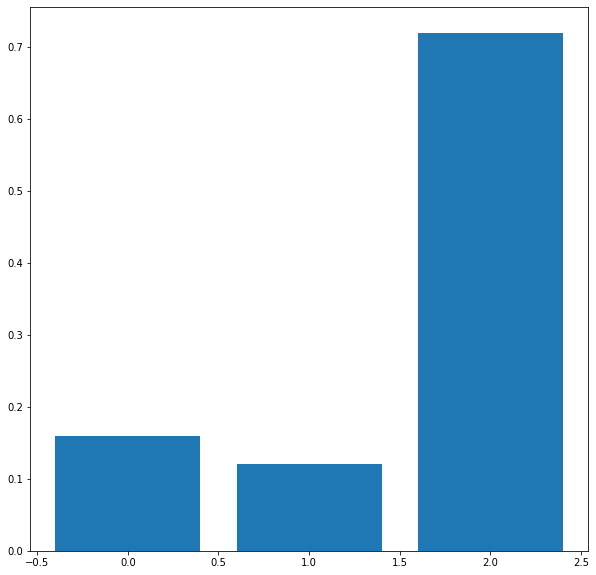

Mean Absolute Error: 8.912298582799457
Mean Squared Error: 138.39885054681938
Root Mean Squared Error: 11.764304082554963


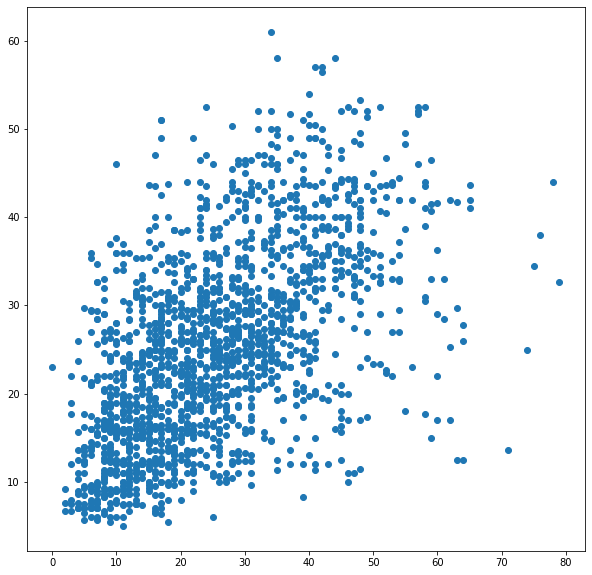

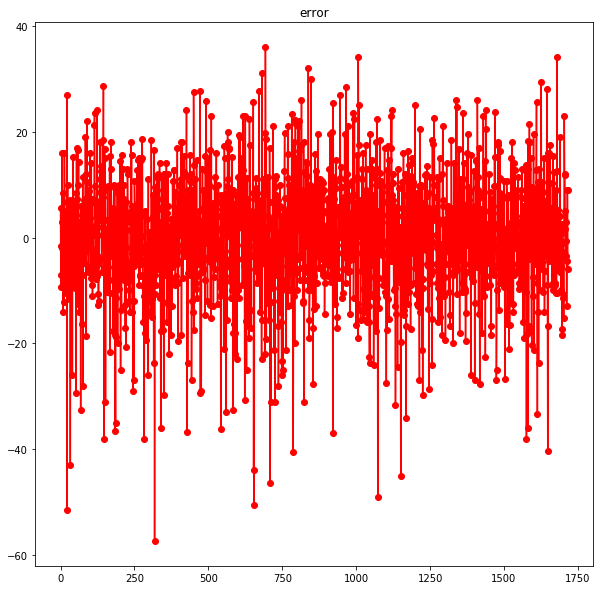

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y7, test_size=0.2,random_state=0)
clf = DecisionTreeRegressor()
clf.fit(X_train,y_train)
y_predc = clf.predict(X_test)
score = clf.score(X_test,y_test)
print('Score:',score)
print('R²: %.2f' % metrics.r2_score(y_test, y_predc))

#get importance
importance = clf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'% (i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()
# Mean Absolute Error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predc))

 # Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_predc))

 # Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predc)))
#  Plot a scatter plot test dependent variables vs predictions
dermse8=np.sqrt(metrics.mean_squared_error(y_test,y_predc))
plt.scatter(y_test,y_predc)
plt.show()
e= [x-y for x,y in zip(y_predc,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

## Sector 8 RandomForest

Score: 0.30185026995121367
R²: 0.30
Feature: 0, Score: 0.16943
Feature: 1, Score: 0.18791
Feature: 2, Score: 0.64266


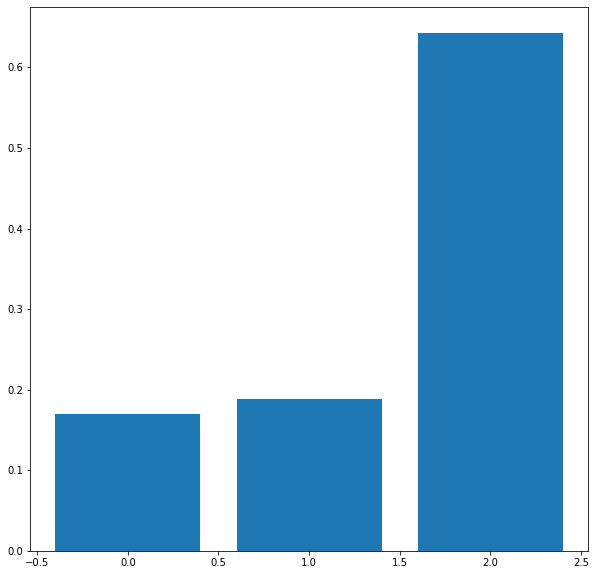

Mean Absolute Error: 8.603137634898752
Mean Squared Error: 129.53127916874598
Root Mean Squared Error: 11.381180921536481


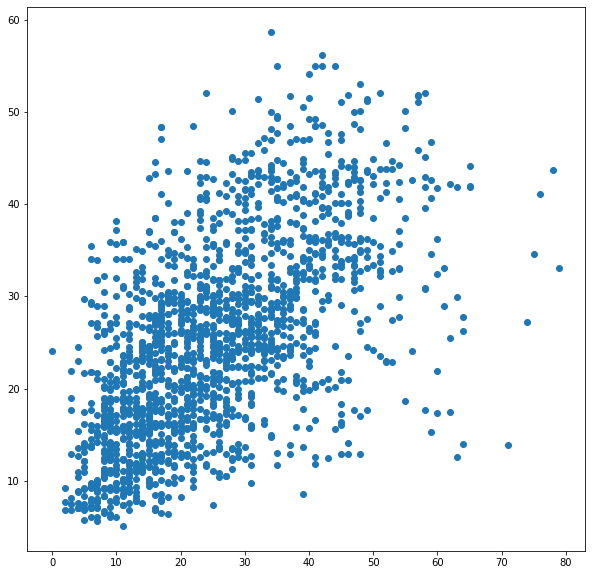

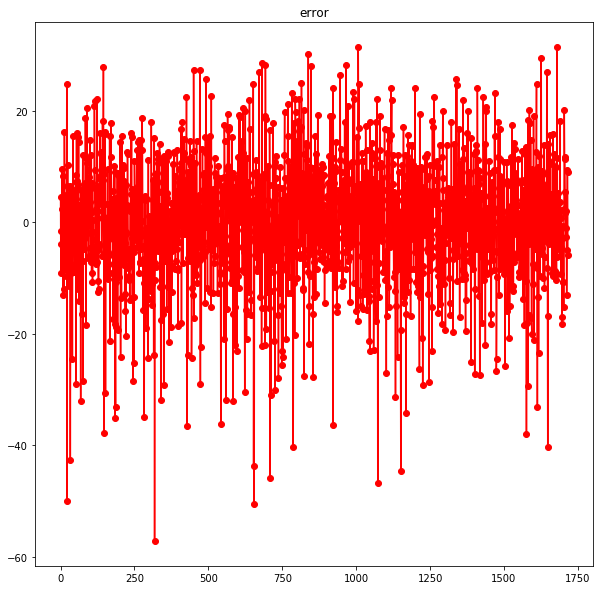

In [147]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train,y_train)
y_predr = rf.predict(X_test)
score = rf.score(X_test,y_test)
print('Score:',score)
print('R²: %.2f' % metrics.r2_score(y_test, y_predr))


#get importance
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'% (i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()

# Mean Absolute Error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predr))

 # Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_predr))

 # Root Mean Squared Error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predr)))
# Plot a scatter plot test dependent variables vs predictions
rfrmse8=np.sqrt(metrics.mean_squared_error(y_test,y_predr))
plt.scatter(y_test,y_predr)
plt.show()
e= [x-y for x,y in zip(y_predr,y_test)]
plt.plot(e,'-ro')
plt.title("error")
plt.show()

# Sector 8 summary

In [148]:
summary8 = pd.DataFrame([{'DummyRMSE':drmse8,'LinearRMSE':rrmse8,'DecisionTreeRMSE':dermse8,'RandomForestRMSE':rfrmse8}])
index=summary8.index
index.name="Sector8"
summary8.head()

,DummyRMSE,LinearRMSE,DecisionTreeRMSE,RandomForestRMSE
Sector8,,,,
0,13.625403,13.507019,11.764304,11.381181


# Summary

In [155]:
summary1.head()


,DummyRMSE,LinearRMSE,DecisionTreeRMSE,RandomForestRMSE
Sector1,,,,
0,47.446735,47.145174,31.598328,30.589105


In [156]:
summary2.head()

,DummyRMSE,LinearRMSE,DecisionTreeRMSE,RandomForestRMSE
Sector2,,,,
0,231.179664,229.793315,130.699986,126.861661


In [157]:
summary3.head()

,DummyRMSE,LinearRMSE,DecisionTreeRMSE,RandomForestRMSE
Sector3,,,,
0,19.038445,18.295956,14.904653,14.489131


In [158]:
summary4.head()

,DummyRMSE,LinearRMSE,DecisionTreeRMSE,RandomForestRMSE
Sector4,,,,
0,114.704413,109.18476,84.920454,81.878897


In [159]:
summary5.head()

,DummyRMSE,LinearRMSE,DecisionTreeRMSE,RandomForestRMSE
Sector5,,,,
0,548.05239,537.488145,394.758965,383.084725


In [160]:
summary6.head()

,DummyRMSE,LinearRMSE,DecisionTreeRMSE,RandomForestRMSE
Sector6,,,,
0,169.330388,155.226906,113.851357,110.079035


In [161]:
summary8.head()

,DummyRMSE,LinearRMSE,DecisionTreeRMSE,RandomForestRMSE
Sector8,,,,
0,13.625403,13.507019,11.764304,11.381181



# The end

This project aimed at successfully implementing machine learning in predicting taxi availability in different sectors in Singapore. However, as noticed, there is a lot more room to improve for the model. The RMSE is good, but it can be better. 

For example:
1. collecting more data over the months (Feb - Dec)
2. collecting more data over the years (2019 and before)
3. tighten the boxes, i.e. instead of nine sectors we divide the map into even smaller sectors for a more granular analysis
